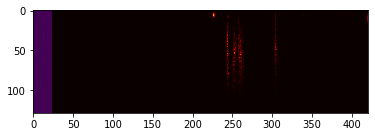

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('data/raw_training/training_data/2530_AV.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram, cmap='hot')
plt.show()

In [35]:
encode = {
        'Age':                      {'Neonate': 0.5, 'Infant': 6, 'Child': 6*12, 'Adolescent': 15*12, 'Young Adult': 20*12}, #represent each age group as the approximate number of months for the middle of the age group
        'Sex':                      {'Male': 0, 'Female': 1},
        'Pregnancy status':         {'True': 1, 'False': 0},
        'Murmur':                   {'Present': 1, 'Absent': 0, 'Unkown': 2},
        'location':                 {'PV': 0, 'TV': 1, 'AV': 2, 'MV': 3, 'Phc': 4},
        'Systolic murmur timing':   {'Early-systolic': 0, 'Holosystolic': 1, 'Mid-systolic': 2, 'Late-systolic': 3},
        'Systolic murmur shape':    {'Crescendo': 0, 'Decrescendo': 1, 'Diamond': 2, 'Plateau': 3},
        'Systolic murmur pitch':    {'Low': 0, 'Medium': 1, 'High': 2},
        'Systolic murmur grading':  {'I/VI': 0, 'II/VI': 1, 'III/VI': 2},
        'Systolic murmur quality':  {'Blowing': 0, 'Harsh': 1, 'Musical': 2},
        'Diastolic murmur timing':  {'Early-diastolic': 0, 'Holodiastolic': 1, 'Mid-diastolic': 2},
        'Diastolic murmur shape':   {'Crescendo': 0, 'Decrescendo': 1, 'Diamond': 2, 'Plateau': 3}, #note: only decresendo and plateau are actually used, other items are included for consistency with 'systolic murmur shape'
        'Diastolic murmur pitch':   {'Low': 0, 'Medium': 1, 'High': 2},
        'Diastolic murmur grading': {'I/IV': 0, 'II/IV': 1, 'III/IV': 2},
        'Diastolic murmur quality': {'Blowing': 0, 'Harsh': 1, 'Musical': 2}, #note: only blowing and harsh are actually used, other items are included for consistency with 'systolic murmur quality'
        'Outcome':                  {'Abnormal': 0, 'Normal': 1}
    }
test = encode['location']['AV']
